
## Exercise 2 (optional):
By adapting the code from Notebook 2, consider the following:

1.1 Generate noisy, simulated data for a model where an input  𝑇  gives output  𝑍  via the relationship,  𝑍=𝑐sin(𝑇+𝑑) . (use c=0.5 and d=-0.25.). **Plot *Z* vs *T* **


1.2 Next, using your simulated data, write a stochastic gradient descent procedure to learn the parameters  (𝑐,𝑑)  from the simulated values of  (𝑇,𝑍) and **Plot the training loss over multiple steps**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.1

In [2]:
c_true = 0.5
d_true = -0.25

In [3]:
n = 30
T = np.linspace(0, 1, num=n)

In [4]:
Z_true = c_true*np.sin(T+d_true)

Text(0, 0.5, 'Z')

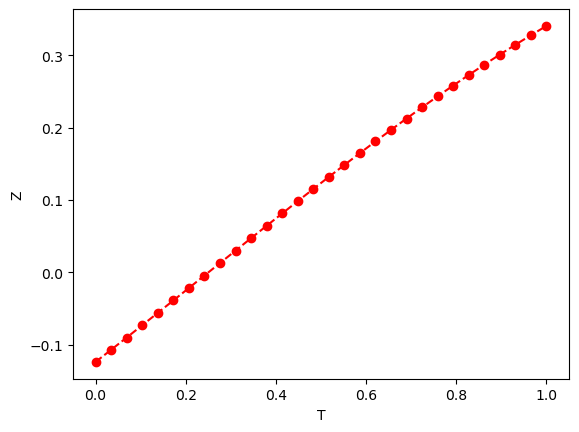

In [5]:
plt.plot(T, Z_true, linestyle='--', marker='o', color='r')
plt.xlabel("T")
plt.ylabel("Z")

In [6]:
# Add Noise
sigma2_true = 0.05 # we can reduce the noise to get a cleaner fit
e = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_true), size=n)

In [7]:
Z = Z_true + e

Text(0, 0.5, 'Z')

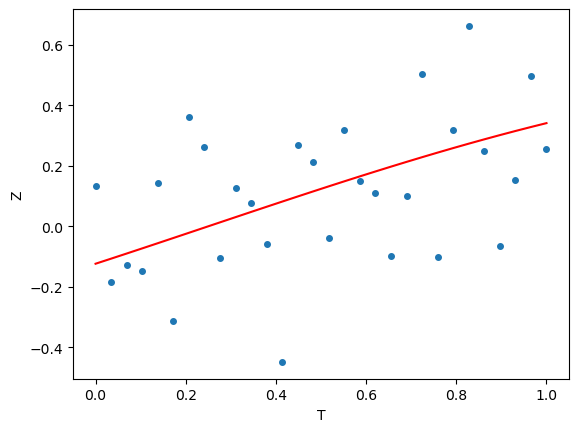

In [8]:
plt.scatter(T, Z, s=16)
plt.plot(T, Z_true, 'r')
plt.xlabel("T")
plt.ylabel("Z")

Text(0, 0.5, 'Z')

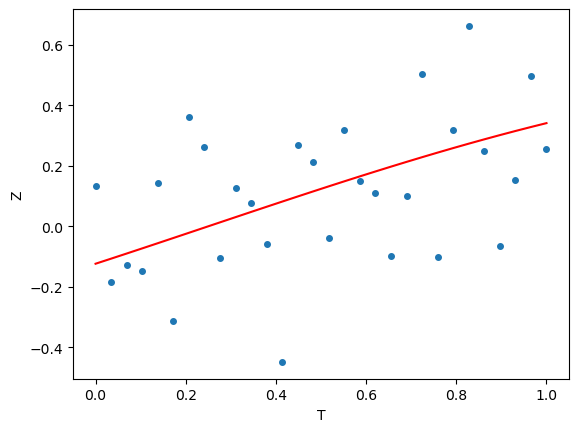

In [10]:


plt.scatter(T, Z, s=16)
plt.plot(T, Z_true, 'r')

plt.xlabel("T")
plt.ylabel("Z")

# 1.2

In [11]:
# Loss Function
def loss_fn(a, b, x, y):
  y_hat = a*x + b # generate prediction of Y based on X and parameters (a, b)
  L = np.sum( (y- y_hat)**2 ) # compute total loss
  return L # return loss

In [12]:
# SGD
n_its = 3000
lam = 0.01
c = 1
d = -1

loss_values = np.zeros(n_its)
c_values = np.zeros(n_its)
d_values = np.zeros(n_its)

for it in range(n_its):

  # sample one random data pair (x, y)
  j = np.random.random_integers(0, n-1)
  xj = T[j]
  yj = Z[j]
  yj_hat = c*xj + d
  
  dlda = np.sum( -2*(yj-yj_hat)*(xj) )
  dldb = np.sum( -2*(yj-yj_hat)*(1) )
  c = c - lam*n*dlda # multiply by n to get estimate of gradient
  d = d - lam*n*dldb # multiply by n to get estimate of gradient

  loss_values[it] = loss_fn(c, d, T, Z)
  c_values[it] = c
  d_values[it] = d

/tmp/ipykernel_909392/777382198.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 29 + 1) instead
  j = np.random.random_integers(0, n-1)


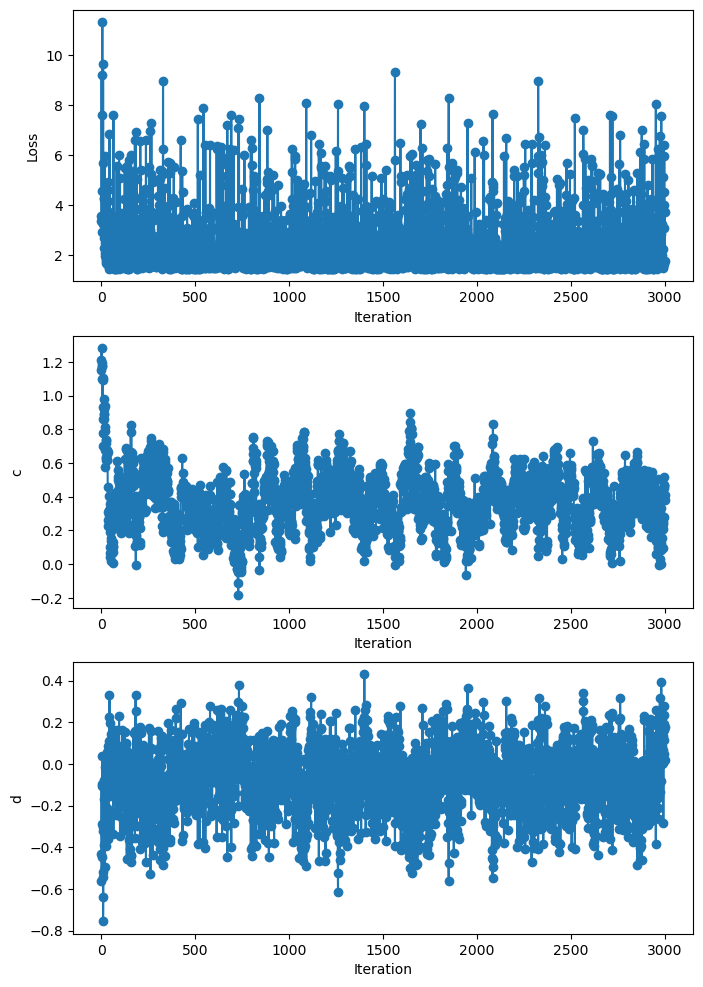

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
#fig.suptitle('A tale of 2 subplots')

ax1.plot(loss_values, 'o-')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

ax2.plot(c_values, 'o-')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('c')

ax3.plot(d_values, 'o-')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('d')
plt.show()

# Use Non-Linear Data

Text(0, 0.5, 'Z')

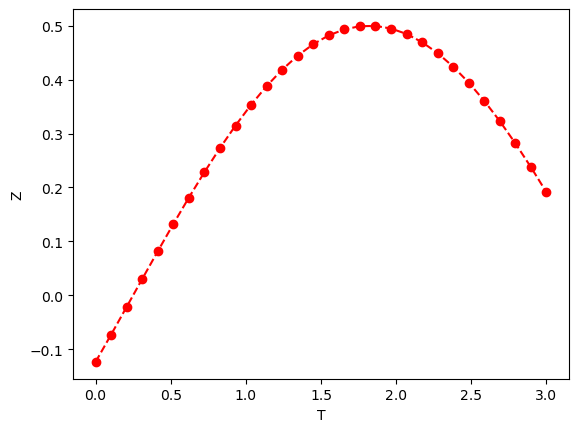

In [14]:
c_true = 0.5
d_true = -0.25
n = 30

T = np.linspace(0, 3, num=n)
Z_true = c_true*np.sin(T+d_true)

plt.plot(T, Z_true, linestyle='--', marker='o', color='r')
plt.xlabel("T")
plt.ylabel("Z")

Text(0, 0.5, 'Z')

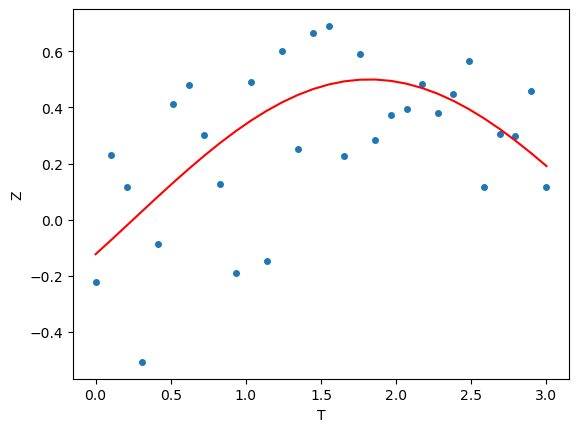

In [15]:
# Add Noise
sigma2_true = 0.05 # we can reduce the noise to get a cleaner fit
e = np.random.normal(loc=0.0, scale=np.sqrt(sigma2_true), size=n)

Z = Z_true + e

plt.scatter(T, Z, s=16)
plt.plot(T, Z_true, 'r')
plt.xlabel("T")
plt.ylabel("Z")

In [18]:
# SGD
n_its = 3000
lam = 0.001
c = 1
d = -1

loss_values = np.zeros(n_its)
c_values = np.zeros(n_its)
d_values = np.zeros(n_its)

for it in range(n_its):

  # sample one random data pair (x, y)
  j = np.random.random_integers(0, n-1)
  xj = T[j]
  yj = Z[j]
  yj_hat = c*xj + d
  
  dlda = np.sum( -2*(yj-yj_hat)*(xj) )
  dldb = np.sum( -2*(yj-yj_hat)*(1) )
  c = c - lam*n*dlda # multiply by n to get estimate of gradient
  d = d - lam*n*dldb # multiply by n to get estimate of gradient

  loss_values[it] = loss_fn(c, d, T, Z)
  c_values[it] = c
  d_values[it] = d

/tmp/ipykernel_909392/2225980505.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 29 + 1) instead
  j = np.random.random_integers(0, n-1)


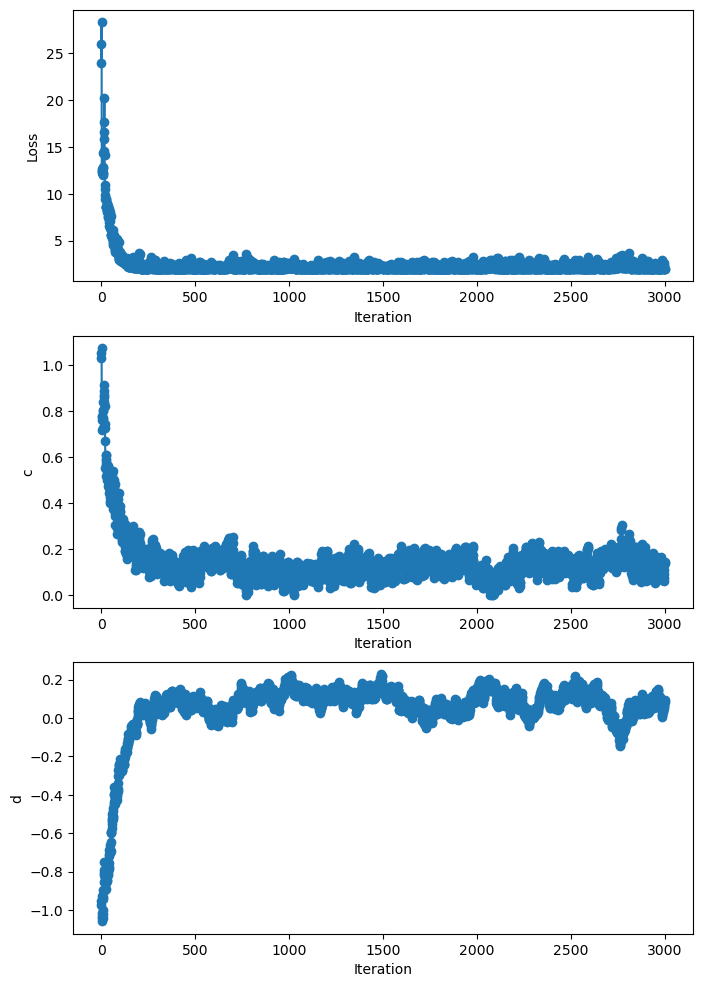

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
#fig.suptitle('A tale of 2 subplots')

ax1.plot(loss_values, 'o-')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

ax2.plot(c_values, 'o-')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('c')

ax3.plot(d_values, 'o-')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('d')
plt.show()

# Adapt Model to Fit Non-Linear Data

In [25]:
# Loss Function
def loss_fn(c, d, x, y):
  y_hat = c*np.sin(x+d) # generate prediction of Y based on X and parameters (a, b)
  L = np.sum( (y- y_hat)**2 ) # compute total loss
  return L # return loss

In [26]:
# SGD
n_its = 3000
lam = 0.01
c = 1
d = -1

loss_values = np.zeros(n_its)
c_values = np.zeros(n_its)
d_values = np.zeros(n_its)

for it in range(n_its):

  # sample one random data pair (x, y)
  j = np.random.random_integers(0, n-1)
  xj = T[j]
  yj = Z[j]
  #yj_hat = c*xj + d
  yj_hat = c*np.sin(xj+d)
  
  dldc = np.sum( -2*(yj-yj_hat)*np.sin(xj+d) ) # compute the derivative of the loss function with respect to c, dL/da
  dldd = np.sum( -2*c*(yj-yj_hat)*np.cos(xj+d) ) # compute the derivative of the loss function with respect to d, dL/db
  c = c - lam*n*dldc # multiply by n to get estimate of gradient
  d = d - lam*n*dldd # multiply by n to get estimate of gradient

  loss_values[it] = loss_fn(c, d, T, Z)
  c_values[it] = c
  d_values[it] = d

/tmp/ipykernel_909392/3020626050.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 29 + 1) instead
  j = np.random.random_integers(0, n-1)


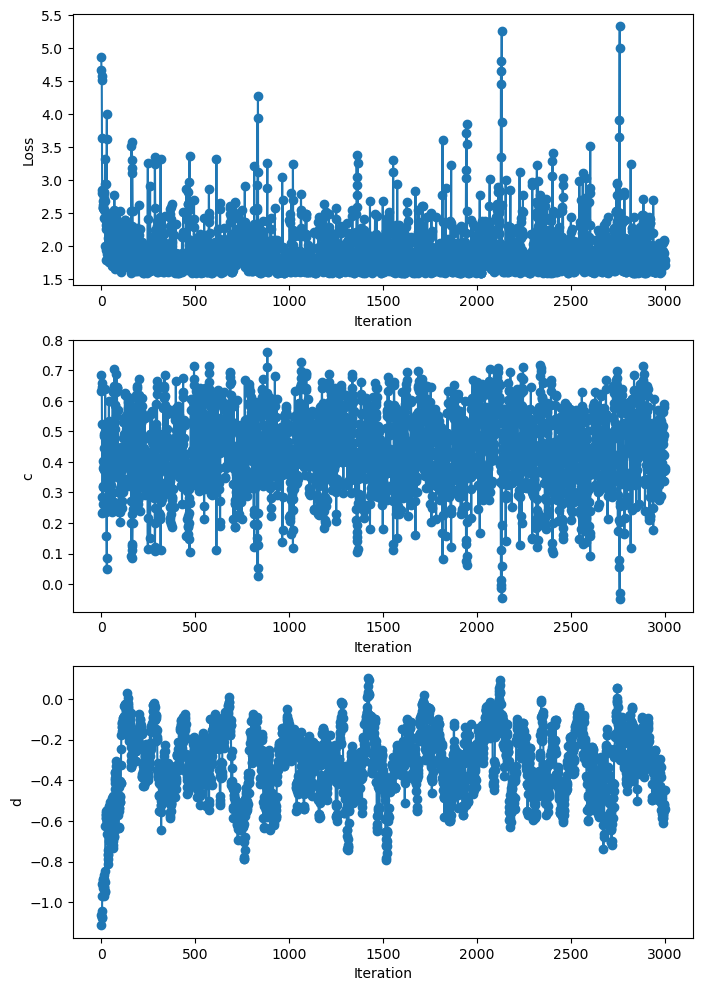

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))
#fig.suptitle('A tale of 2 subplots')

ax1.plot(loss_values, 'o-')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')

ax2.plot(c_values, 'o-')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('c')

ax3.plot(d_values, 'o-')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('d')
plt.show()

In [22]:
loss_values

array([19.00285456, 14.28950731, 20.370288  , ...,  7.40291816,
        8.54611264, 12.23063324])

In [23]:
a =np.random.rand()

In [24]:
a

0.5521582504464455